# Visualizing data

This notebook demonstrates how to create data visualizations using: 
- Matplotlib and Seaborn
- Plotly
- Word-clouds

---

In [60]:
# If Seaborn or any other libraries are missing, you can install them using "!pip install"

#!pip install seaborn

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk import FreqDist

## Matplotlib

In [62]:
url = "https://raw.githubusercontent.com/CaptSolo/BSSDH_2023_beginners/main/corpora/en_old_newspapers_5k.tsv"
df = pd.read_csv(url, sep="\t")

In [63]:
df.head(5)

,Source,Date,Type,Subjects,Text
0,latimes.com,2012/04/29,1,"7,12","He wasn't home alone, apparently."
1,stltoday.com,2011/07/10,1,"7,10",The St. Louis plant had to close. It would die...
2,freep.com,2012/05/07,1,10,WSU's plans quickly became a hot topic on loca...
3,nj.com,2011/02/05,1,1,The Alaimo Group of Mount Holly was up for a c...
4,sacbee.com,2011/10/02,1,5,And when it's often difficult to predict a law...


In [64]:
# https://dariuslfuller.medium.com/creating-visuals-with-nltks-freqdist-ac4e667e49f3

all_text = "\n".join(df["Text"]).split()
all_fdist = FreqDist(all_text).most_common(20)

In [65]:
all_text[:20]

['He',
 "wasn't",
 'home',
 'alone,',
 'apparently.',
 'The',
 'St.',
 'Louis',
 'plant',
 'had',
 'to',
 'close.',
 'It',
 'would',
 'die',
 'of',
 'old',
 'age.',
 'Workers',
 'had']

In [66]:
all_fdist

[('the', 8379),
 ('to', 4422),
 ('and', 4137),
 ('a', 4102),
 ('of', 3886),
 ('in', 3052),
 ('for', 1733),
 ('that', 1490),
 ('is', 1462),
 ('on', 1261),
 ('with', 1204),
 ('The', 1132),
 ('was', 1082),
 ('at', 942),
 ('as', 811),
 ('he', 797),
 ('it', 761),
 ('from', 750),
 ('are', 716),
 ('be', 713)]

In [67]:
# converting data to Pandas series
all_fdist = pd.Series(dict(all_fdist))

In [68]:
all_fdist[:10]

the     8379
to      4422
and     4137
a       4102
of      3886
in      3052
for     1733
that    1490
is      1462
on      1261
dtype: int64

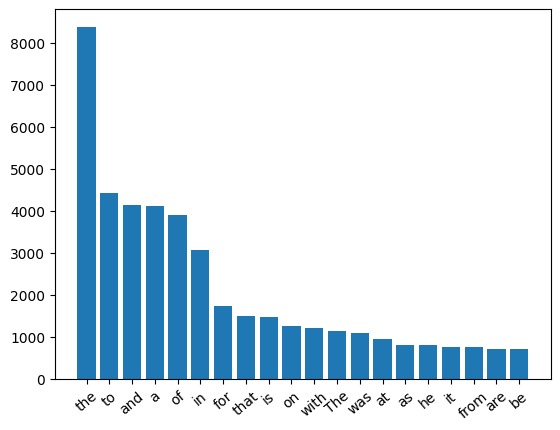

In [69]:
## Matplotlib bar plot using Pandas attributes + xtick rotation for ease of viewing

all_plot = plt.bar(all_fdist.index, all_fdist.values)
ticks = plt.xticks(rotation=40)

Text(0.5, 1.0, 'Word Frequency Bar Plot')

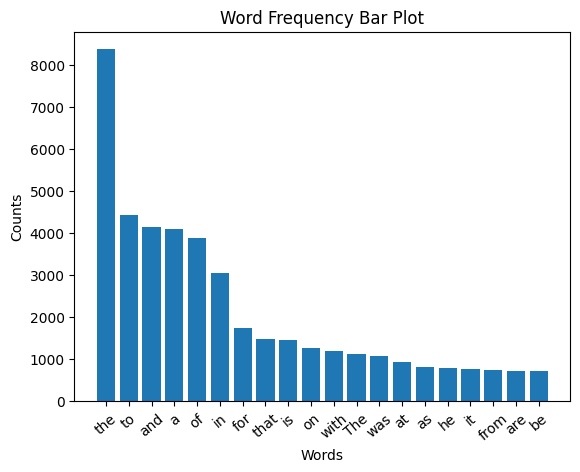

In [70]:
# Add labels and title

all_plot = plt.bar(all_fdist.index, all_fdist.values)
ticks = plt.xticks(rotation=40)

plt.xlabel('Words')
plt.ylabel('Counts')
plt.title('Word Frequency Bar Plot')


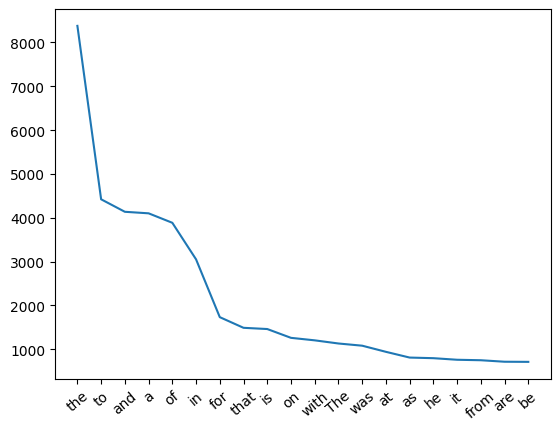

In [71]:
# Matplotlib line plot

all_plot = plt.plot(all_fdist.index, all_fdist.values)
ticks = plt.xticks(rotation=40)

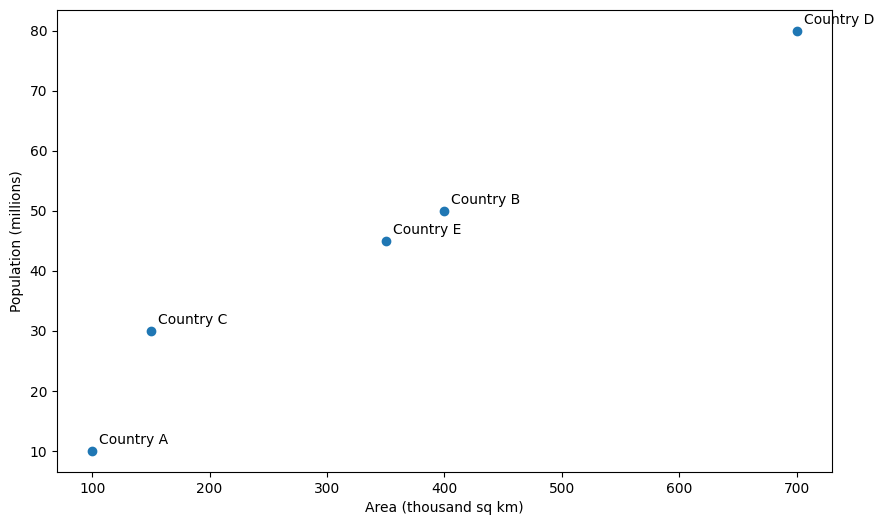

In [72]:
# Demo of a scatter plot (with synthetic data about countries)

countries = ['Country A', 'Country B', 'Country C', 'Country D', 'Country E']
population = [10, 50, 30, 80, 45]  # in millions
area = [100, 400, 150, 700, 350]   # in thousand square km

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(area, population)

# Annotate plot points with country names
for i, country in enumerate(countries):
    plt.annotate(country, (area[i], population[i]), xytext=(5, 5), textcoords='offset points')

plt.xlabel('Area (thousand sq km)')
plt.ylabel('Population (millions)')

plt.show()

### Stopword removal

For widely used languages such as English we can use NLTK's stopword list.

In [73]:
nltk.download('stopwords')

stopwords = nltk.corpus.stopwords.words('english')
print(stopwords[:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/captsolo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [74]:
# let's convert the list to a set (with more efficient work lookup operations)
stopword_set = set(stopwords)

In [75]:
# removing stopwords
all_text_stopped = [word for word in all_text if word.lower() not in stopword_set]

# let's also remove some special symbols
spec_chars = ['--', '—', '-']
all_text_stopped = [word for word in all_text_stopped if word not in spec_chars]

all_text_stopped[:6]

['home', 'alone,', 'apparently.', 'St.', 'Louis', 'plant']

In [76]:
# let's draw freq distribution again

all_fdist_stopped = FreqDist(all_text_stopped).most_common(20)
all_fdist_stopped = pd.Series(dict(all_fdist_stopped))

for line in all_fdist_stopped.keys():
    print(line, ":\t", all_fdist_stopped[line])

said :	 682
said. :	 462
one :	 335
would :	 323
two :	 281
also :	 261
like :	 228
last :	 219
first :	 207
get :	 201
could :	 201
people :	 183
new :	 182
going :	 173
time :	 165
many :	 153
years :	 151
year :	 150
three :	 145
state :	 144


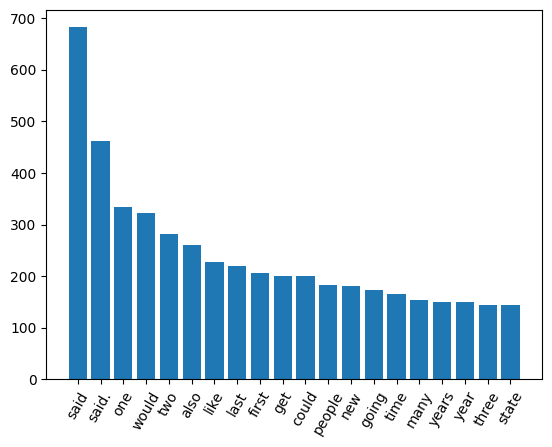

In [77]:
# vertical bar chart

all_plot = plt.bar(all_fdist_stopped.index, all_fdist_stopped.values)
ticks = plt.xticks(rotation=60)

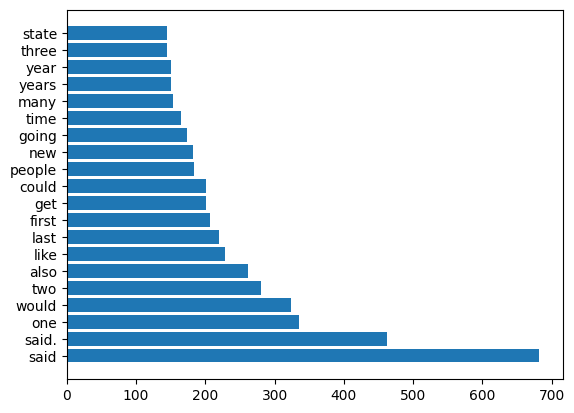

In [78]:
# horizontal bar chart

all_plot = plt.barh(all_fdist_stopped.index, all_fdist_stopped.values)

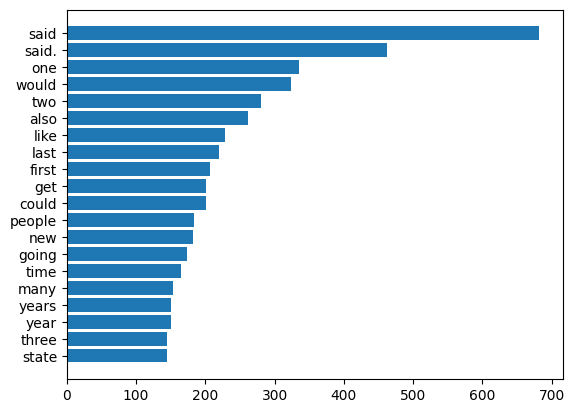

In [79]:
all_plot = plt.barh(all_fdist_stopped.index, all_fdist_stopped.values)
ax = plt.gca()
ax.invert_yaxis()

### Stopwords for languages not included in NLTK

Previously we used stopwords from NLTK stopword list but that won't work for Latvian or other languages not included in NLTK.

Let's use an existing Latvian stopword list from Github:

In [80]:
import requests

stop_url = "https://raw.githubusercontent.com/Xangis/extra-stopwords/master/latvian"
res = requests.get(stop_url)

stopwords_lv = res.text.split()
print(stopwords_lv[:10])

stopword_set_lv = set(stopwords_lv)

['aiz', 'ap', 'ar', 'apakš', 'ārpus', 'augšpus', 'bez', 'caur', 'dēļ', 'gar']


In [81]:
# reading our text corpus

import pandas as pd

url_2 = "https://raw.githubusercontent.com/CaptSolo/BSSDH_2023_beginners/main/corpora/lv_old_newspapers_5k.tsv"
df_2 = pd.read_csv(url_2, sep="\t")

In [82]:
all_text_lv = "\n".join(df_2["Text"]).split()
all_fdist_lv = FreqDist(all_text_lv).most_common(20)

In [83]:
# converting data to Pandas series
all_fdist_lv = pd.Series(dict(all_fdist_lv))

In [84]:
# removing stopwords
all_text_stopped_lv = [word for word in all_text_lv if word not in stopword_set_lv]

# removing special characters
spec_chars = ['-', '–', '—']
all_text_stopped_lv = [word for word in all_text_stopped_lv if word not in spec_chars]

all_text_stopped_lv[:6]

['"Viņa', 'pirmsnāves', 'zīmītē', 'rakstīts', 'vienīgi', 'smēķēšanas']

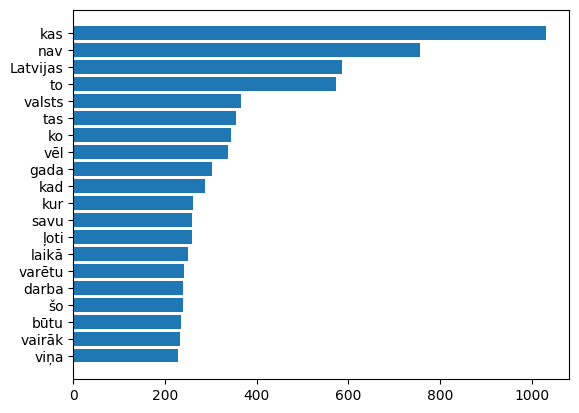

In [85]:
# draw freq distribution

all_fdist_stopped_lv = FreqDist(all_text_stopped_lv).most_common(20)
all_fdist_stopped_lv = pd.Series(dict(all_fdist_stopped_lv))

all_plot_lv = plt.barh(all_fdist_stopped_lv.index, all_fdist_stopped_lv.values)
ax = plt.gca()
ax.invert_yaxis()

### Histograms

Let's create a histogram displaying text word length.

A histogram is a type of graph that shows how often different numbers or ranges of numbers appear in a dataset. 

In [86]:
all_text[:10]

['He',
 "wasn't",
 'home',
 'alone,',
 'apparently.',
 'The',
 'St.',
 'Louis',
 'plant',
 'had']

In [87]:
# for every word, return its length
word_length = [len(word) for word in all_text]

word_length[:10]

[2, 6, 4, 6, 11, 3, 3, 5, 5, 3]

(array([3.0574e+04, 5.8756e+04, 3.7093e+04, 2.5737e+04, 7.7350e+03,
        7.6960e+03, 2.4880e+03, 6.7600e+02, 1.7300e+02, 3.3000e+01,
        4.2000e+01, 2.2000e+01, 8.0000e+00, 1.2000e+01, 2.0000e+00,
        2.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([ 1. ,  2.8,  4.6,  6.4,  8.2, 10. , 11.8, 13.6, 15.4, 17.2, 19. ,
        20.8, 22.6, 24.4, 26.2, 28. , 29.8, 31.6, 33.4, 35.2, 37. ]),
 <BarContainer object of 20 artists>)

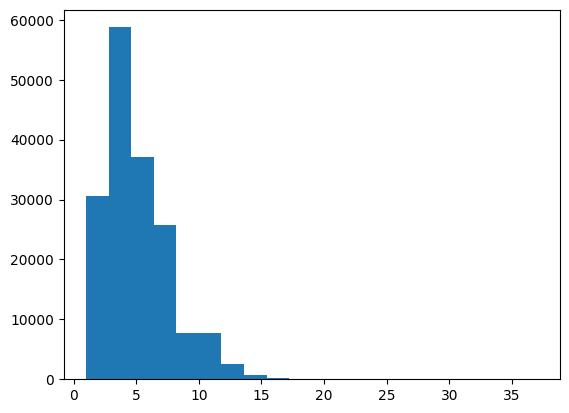

In [88]:
n_bins = 20

# Matplotlib histogram plot
plt.hist(word_length, bins=n_bins)

In [89]:
long_words = [word for word in all_text if len(word) >= 15]

long_words[:10]

['accountability,',
 'theCareerBuilder.comad',
 'Child-wellbeing',
 'http://www.acy.org',
 'low-birthweight',
 'prepaid-tuition',
 'under-reporting',
 'experience—dancing,',
 'life-threatening',
 'disappointment.']

## Seaborn

Seaborn is a Python data visualization library based on Matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

https://seaborn.pydata.org/

In [90]:
data = FreqDist(all_text_stopped).most_common(20)
data = pd.DataFrame(data, columns = ["Word","Frequency"])

data[:10]

,Word,Frequency
0,said,682
1,said.,462
2,one,335
3,would,323
4,two,281
5,also,261
6,like,228
7,last,219
8,first,207
9,get,201


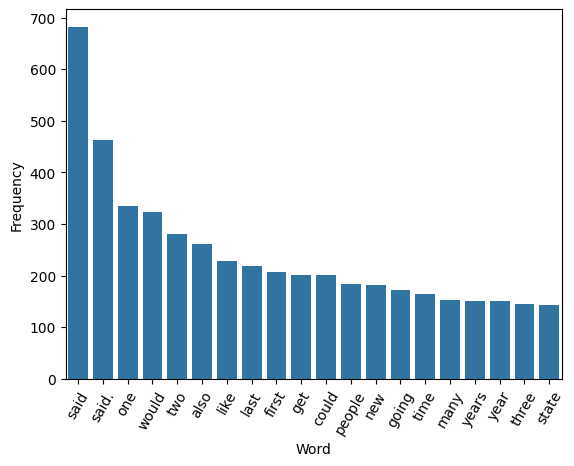

In [91]:
ax = sns.barplot(data, x="Word", y="Frequency")

ax.set_xticks(range(len(data["Word"])))
ax = ax.set_xticklabels(data["Word"], rotation=60)

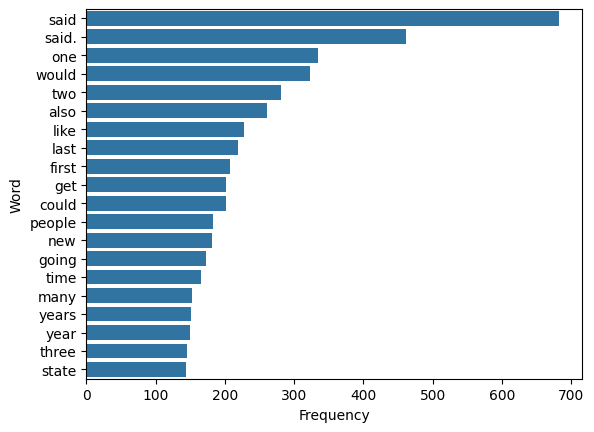

In [92]:
ax = sns.barplot(data, y="Word", x="Frequency", orient="h")

<Axes: ylabel='Count'>

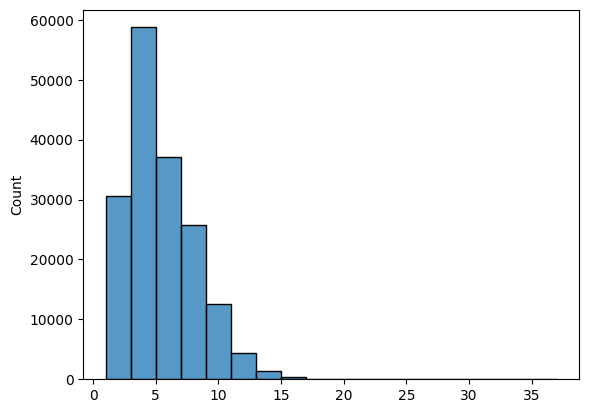

In [93]:
# Seaborn histplot is similar to Matplotlib hist()
# with some improvements

# https://seaborn.pydata.org/generated/seaborn.histplot.html

sns.histplot(word_length, binwidth=2)

### Visualizing bigrams

In [94]:
import nltk.collocations as collocations
from nltk import FreqDist, bigrams

In [95]:
ngrams = bigrams(all_text_stopped)

from itertools import islice

for item in islice(ngrams, 10):
    print(item)

('home', 'alone,')
('alone,', 'apparently.')
('apparently.', 'St.')
('St.', 'Louis')
('Louis', 'plant')
('plant', 'close.')
('close.', 'would')
('would', 'die')
('die', 'old')
('old', 'age.')


In [96]:
ngrams = bigrams(all_text_stopped)

ngram_freq_list = FreqDist(ngrams).most_common(20)

In [97]:
ngram_freq_list[:5]

[(('New', 'York'), 38),
 (('last', 'year'), 33),
 (('New', 'Jersey'), 32),
 (('.', '.'), 29),
 (('St.', 'Louis'), 25)]

In [98]:
# this program expects Python 3.6 or later where dictionary
# items maintain their insertion order.

ngram_dict = {}

for words, count in ngram_freq_list:
    key = "_".join(words)
    ngram_dict[key] = count

print(ngram_dict)

{'New_York': 38, 'last_year': 33, 'New_Jersey': 32, '._.': 29, 'St._Louis': 25, 'said._"I': 21, 'first_time': 21, 'health_care': 20, 'said._"We': 20, 'years_ago,': 18, 'high_school': 16, 'Los_Angeles': 16, 'said_would': 15, 'High_School': 14, 'United_States': 13, 'last_week': 12, 'time_since': 12, 'executive_director': 12, 'San_Francisco': 12, 'years_ago': 11}


In [99]:
ngram_freqdist = pd.Series(ngram_dict)

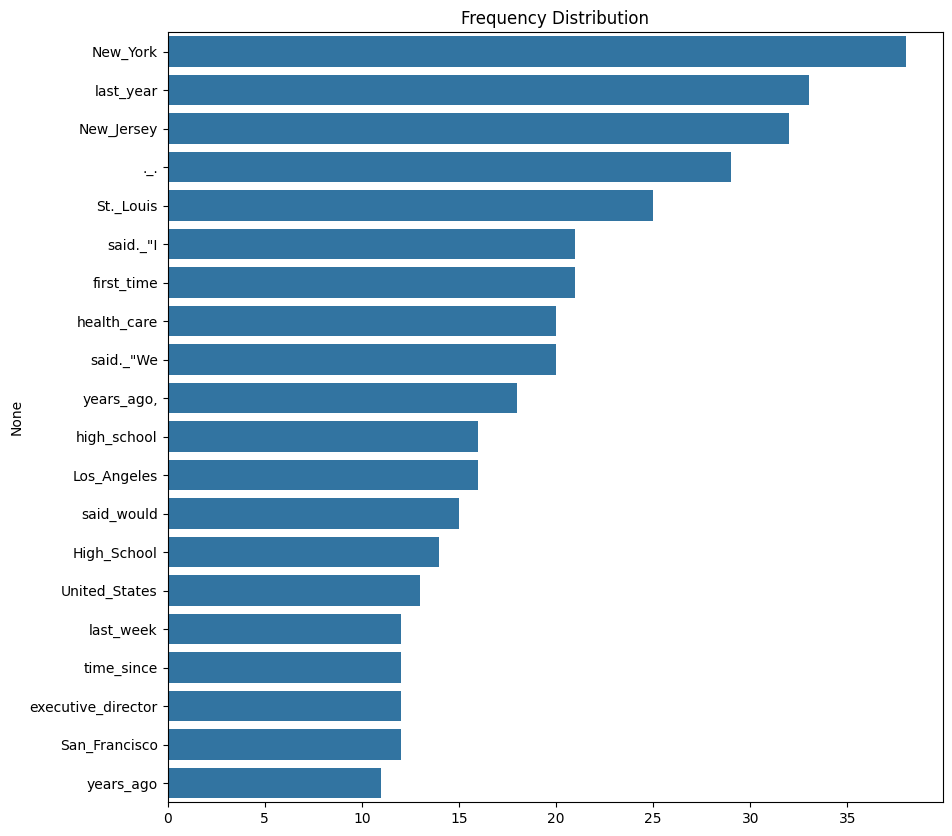

In [100]:
# plot the figure

fig, ax = plt.subplots(figsize=(10,10))

## set the plot to horizontal + set title + display
bar_plot = sns.barplot(x=ngram_freqdist.values, y=ngram_freqdist.index, orient='h', ax=ax)
title = plt.title('Frequency Distribution')

## Plotly

Plotly graphing library helps you make interactive, publication-quality graphs:
- https://plotly.com/python/

The plotly.express module (typically imported as px) contains functions that can create entire figures at once. Plotly Express is built-in to the plotly library, and is the recommended starting point for creating most common figures.
- https://plotly.com/python/plotly-express/

In [101]:
import plotly.express as px

In [102]:
url = "https://raw.githubusercontent.com/CaptSolo/BSSDH_2023_beginners/main/corpora/en_old_newspapers_5k.tsv"
df = pd.read_csv(url, sep="\t")

all_text = "\n".join(df["Text"]).split()
all_fdist = FreqDist(all_text).most_common(40)

df_all_fdist = pd.DataFrame(all_fdist, columns=["Word", "Frequency"])

df_all_fdist.head(5)


,Word,Frequency
0,the,8379
1,to,4422
2,and,4137
3,a,4102
4,of,3886


In [103]:
# Create a bar chart
fig = px.bar(df_all_fdist, x='Word', y='Frequency')

fig.show(renderer="colab")


In [104]:
# Scatter plot example

countries = ['Country A', 'Country B', 'Country C', 'Country D', 'Country E']
population = [10, 50, 30, 80, 45]  # in millions
area = [100, 400, 150, 700, 350]   # in thousand square km

data = pd.DataFrame({
    'Country': countries,
    'Population': population,
    'Area': area
})

In [105]:
# Create scatter plot with Plotly
fig = px.scatter(data, x='Area', y='Population', text='Country')

# Update layout for better readability
fig.update_traces(textposition='top center')
fig.update_layout(
    title='Population vs Area of Countries',
    xaxis_title='Area (thousand sq km)',
    yaxis_title='Population (millions)',
    showlegend=False
)

# Show the plot
fig.show(renderer="colab")

## Word-cloud visualization

https://github.com/amueller/word_cloud

In [106]:
## not needed if the WordCloud library is already installed
#!pip install wordcloud

In [107]:
import matplotlib.pyplot as plt

from wordcloud import WordCloud

In [108]:
# Let's prepare the text to visualize

url = "https://raw.githubusercontent.com/CaptSolo/BSSDH_2023_beginners/main/corpora/en_old_newspapers_5k.tsv"
df = pd.read_csv(url, sep="\t")

all_text = "\n".join(df["Text"]).split()

stopword_set = set(stopwords)

# removing stopwords
all_text_stopped = [word for word in all_text if word.lower() not in stopword_set]

In [109]:
all_text_stopped[:10]

['home',
 'alone,',
 'apparently.',
 'St.',
 'Louis',
 'plant',
 'close.',
 'would',
 'die',
 'old']

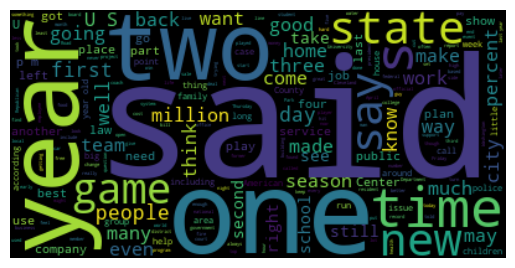

In [110]:
text = " ".join(all_text_stopped)
wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

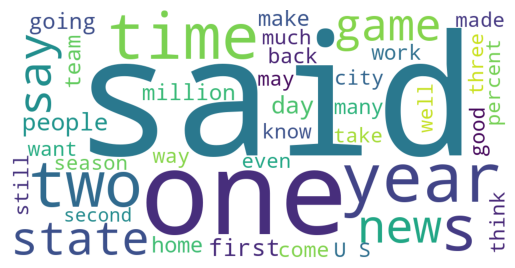

In [111]:
# lower max_font_size, change the maximum number of word and lighten the background:

wordcloud = WordCloud(width=1000, height=500, max_words=40, background_color="white").generate(text)

plt.figure()
plt.imshow(wordcloud) #, interpolation="bilinear")
plt.axis("off")
plt.show()

In [112]:
# Save the image in a file:
wordcloud.to_file("wordcloud.png")

---

## Additional Information

Matplotlib supports many types of graphs:
- [Matplotlib plot types](https://matplotlib.org/stable/plot_types/index.html)
- [Matplotlib gallery](https://matplotlib.org/stable/gallery/index.html)

More information about Seaborn:
* https://seaborn.pydata.org/tutorial/introduction.html
* https://seaborn.pydata.org/tutorial/distributions.html
* https://seaborn.pydata.org/examples/index.html

Word-cloud generation:
* https://github.com/amueller/word_cloud

Tutorials:
* [Matplotlib tutorial](https://github.com/rougier/matplotlib-tutorial) by Nicolas P. Rougier
* [Pyplot tutorial](https://matplotlib.org/stable/tutorials/introductory/pyplot.html)



---

## Your turn!

Choose a text corpus and **visualize it** using the tools shown in this notebook.

**Write code in notebook cells below**.